https://github.com/sakshibutala/CNN_AlphabetRecognition  

https://towardsdatascience.com/building-and-deploying-an-alphabet-recognition-system-7ab59654c676
## Alphabet Recognition System using Convolutional Neural Network (CNN)

Convolutional Neural Network (CNN) is a Deep Learning Algorithm widely used for character recognition. This algorithm identifies the alphabet from the given input image.

The accuracy achieved using this algorithm is 93.42%.

## 1. Anvil Integration

In [1]:
'''import anvil.server
import anvil.media
anvil.server.connect("44STZQZQTYAAVHHWGRPMXDRN-P5VUQGPD3HW5UMWJ")
'''

'import anvil.server\nimport anvil.media\nanvil.server.connect("44STZQZQTYAAVHHWGRPMXDRN-P5VUQGPD3HW5UMWJ")\n'

## 2. Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
import os
import pickle

## 3. Defining the Model Architecture

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 26, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 128)             

## 4. Importing the Dataset

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    directory = 'Training',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'

)

test_generator = test_datagen.flow_from_directory(
    directory = 'Testing',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'

)

Found 501 images belonging to 26 classes.
Found 260 images belonging to 26 classes.


## 5. Training the Model

In [5]:
history = model.fit_generator(train_generator,
                         steps_per_epoch = 16,
                         epochs = 3,
                         validation_data = test_generator,
                         validation_steps = 16)

C:\Users\an199\AppData\Local\Temp\ipykernel_6492\2069286868.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/3


16/16 [==============================] - 672s 42s/step - loss: 3.1307 - accuracy: 0.1317 - val_loss: 2.8998 - val_accuracy: 0.3846
Epoch 2/3
16/16 [==============================] - 3s 176ms/step - loss: 2.1747 - accuracy: 0.5250
Epoch 3/3
16/16 [==============================] - 3s 166ms/step - loss: 1.0240 - accuracy: 0.6846


## 6. Saving/Loading the Model

In [6]:
pickle.dump(model, open('CNN_model.sav', 'wb'))

In [7]:
model = pickle.load(open('CNN_model.sav','rb'))

## 7. Testing the Model

In [8]:
def get_result(result):
    if result[0][0] == 1:
        return('a')
    elif result[0][1] == 1:
        return ('b')
    elif result[0][2] == 1:
        return ('c')
    elif result[0][3] == 1:
        return ('d')
    elif result[0][4] == 1:
        return ('e')
    elif result[0][5] == 1:
        return ('f')
    elif result[0][6] == 1:
        return ('g')
    elif result[0][7] == 1:
        return ('h')
    elif result[0][8] == 1:
        return ('i')
    elif result[0][9] == 1:
        return ('j')
    elif result[0][10] == 1:
        return ('k')
    elif result[0][11] == 1:
        return ('l')
    elif result[0][12] == 1:
        return ('m')
    elif result[0][13] == 1:
        return ('n')
    elif result[0][14] == 1:
        return ('o')
    elif result[0][15] == 1:
        return ('p')
    elif result[0][16] == 1:
        return ('q')
    elif result[0][17] == 1:
        return ('r')
    elif result[0][18] == 1:
        return ('s')
    elif result[0][19] == 1:
        return ('t')
    elif result[0][20] == 1:
        return ('u')
    elif result[0][21] == 1:
        return ('v')
    elif result[0][22] == 1:
        return ('w')
    elif result[0][23] == 1:
        return ('x')
    elif result[0][24] == 1:
        return ('y')
    elif result[0][25] == 1:
        return ('z')

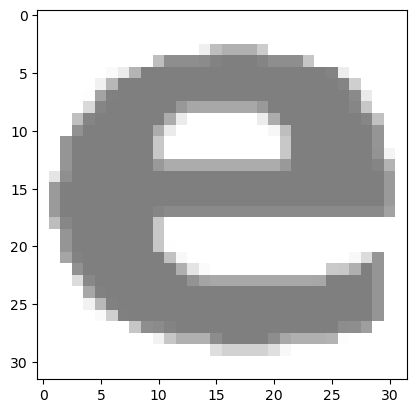

In [9]:
filename = r'Testing\e\25.png'
test_image = image.load_img(filename, target_size = (32,32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)


In [10]:
result = model.predict(test_image)
result = get_result(result)
print ('Predicted Alphabet is: {}'.format(result))

1/1 [==============================] - 1s 584ms/step
Predicted Alphabet is: e


## 8. Predicting the Alphabet from the Input Image

This part of code is receives the input image from the anvil website and returns the predicted alphabet back to the website.

In [11]:
'''@anvil.server.callable
def model_run(path):
    with anvil.media.TempFile(path) as filename:
        test_image = image.load_img(filename, target_size = (32,32))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        result = model.predict(test_image)
        result = get_result(result)
        return ('Predicted Alphabet is: {}'.format(result))
'''     

NameError: name 'anvil' is not defined